<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.datasets import mnist

In [10]:
img_path = r"pic.jpeg"

## Task 1

1.1	Image resizing (interpolation methods)
1.1.1	Linear
1.1.2	Nearest Neighbors
1.1.3	Polynomial

In [11]:
img = cv2.imread(img_path)

In [20]:


sz = (100, 100)
img_linear = cv2.resize(img, sz, interpolation=cv2.INTER_LINEAR)
img_nearest = cv2.resize(img, sz, interpolation=cv2.INTER_NEAREST)
img_cubic = cv2.resize(img, sz, interpolation=cv2.INTER_CUBIC)

In [21]:
blur_box = cv2.blur(img, (5, 5))
blur_gaussian = cv2.GaussianBlur(img, (5, 5), 0)
blur_median = cv2.medianBlur(img, 5)

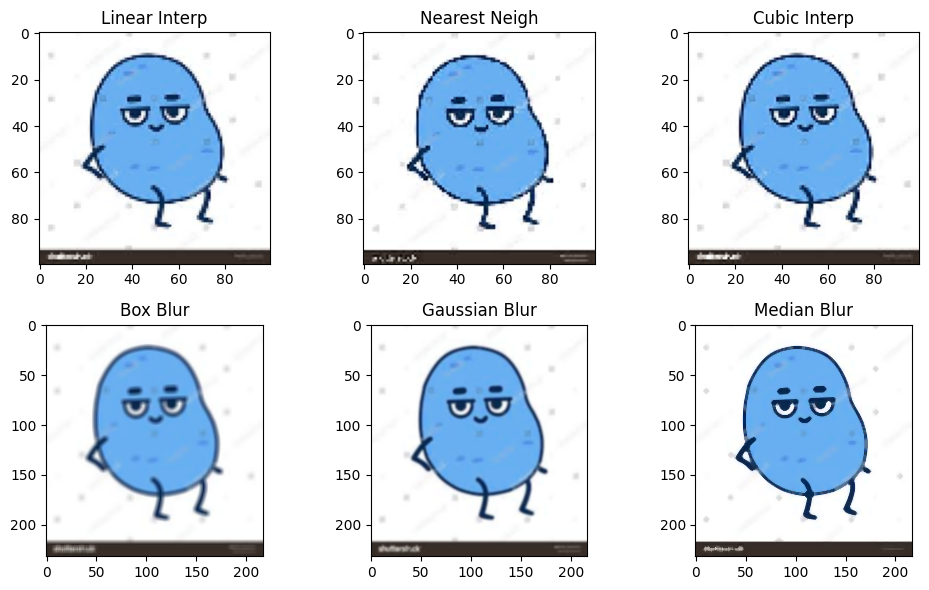

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes[0, 0].imshow(img_linear)
axes[0, 0].set_title("Linear Interp")
axes[0, 1].imshow(img_nearest)
axes[0, 1].set_title("Nearest Neigh")
axes[0, 2].imshow(img_cubic)
axes[0, 2].set_title("Cubic Interp")
axes[1, 0].imshow(blur_box)
axes[1, 0].set_title("Box Blur")
axes[1, 1].imshow(blur_gaussian)
axes[1, 1].set_title("Gaussian Blur")
axes[1, 2].imshow(blur_median)
axes[1, 2].set_title("Median Blur")
plt.tight_layout()
plt.show()

## Task 2

In [24]:
(trnX, trnY), (tstX, tstY) = mnist.load_data()
trnX = trnX.astype('float32') / 255.
tstX = tstX.astype('float32') / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
trnX = trnX.reshape(trnX.shape[0], -1)
tstX = tstX.reshape(tstX.shape[0], -1)

In [27]:
clf_dict = {}
clf_dict['NaiveBayes'] = GaussianNB()
clf_dict['RandForest'] = RandomForestClassifier()


Model: NaiveBayes
Accuracy: 0.5558
Precision: 0.6917
Recall: 0.5558
F1 Score: 0.5170
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
AUC: 0.9778


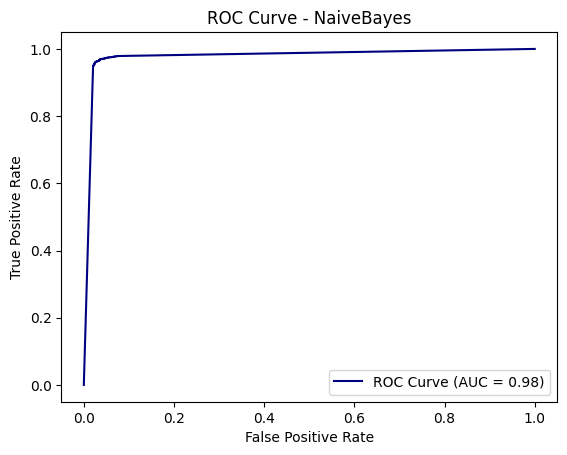


Model: RandForest
Accuracy: 0.9682
Precision: 0.9682
Recall: 0.9682
F1 Score: 0.9682
Confusion Matrix:
[[ 969    0    0    0    0    3    3    1    3    1]
 [   0 1123    2    4    1    0    4    0    1    0]
 [   6    0  997    7    2    0    4   10    6    0]
 [   0    0   10  974    0    8    0    9    7    2]
 [   1    0    1    0  954    0    6    1    4   15]
 [   3    0    0   14    3  854    6    2    7    3]
 [   8    3    0    0    2    3  940    0    2    0]
 [   1    4   20    1    3    0    0  983    3   13]
 [   5    0    5   10    4    4    3    3  929   11]
 [   7    5    1   12   11    3    1    5    5  959]]
AUC: 0.9999


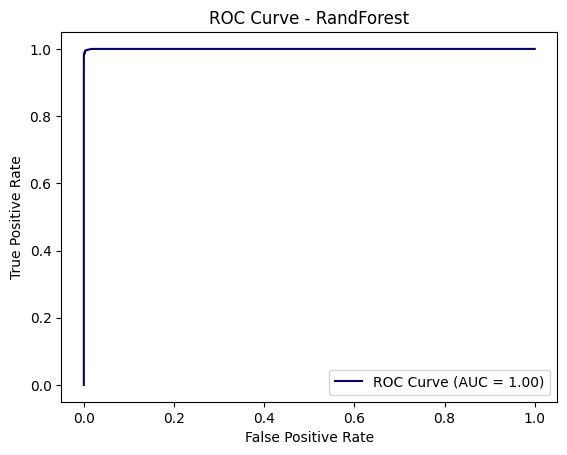

In [28]:
for key in clf_dict:
    clf = clf_dict[key]
    clf.fit(trnX, trnY)
    predY = clf.predict(tstX)
    if hasattr(clf, "predict_proba"):
        probaY = clf.predict_proba(tstX)
    else:
        probaY = None
    acc = accuracy_score(tstY, predY)
    prec = precision_score(tstY, predY, average='weighted')
    rec = recall_score(tstY, predY, average='weighted')
    f1val = f1_score(tstY, predY, average='weighted')
    cmatrix = confusion_matrix(tstY, predY)
    if probaY is not None:
        fpr, tpr, _ = roc_curve(tstY, probaY[:, 1], pos_label=1)
        aucval = auc(fpr, tpr)
    else:
        aucval = None
    print(f"\nModel: {key}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1val:.4f}")
    print("Confusion Matrix:")
    print(cmatrix)
    if aucval is not None:
        print(f"AUC: {aucval:.4f}")
        plt.figure()
        plt.plot(fpr, tpr, color='navy', label=f"ROC Curve (AUC = {aucval:.2f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {key}')
        plt.legend(loc='lower right')
        plt.show()